**1. Explain what problem you are going to solve using this dataset. Provide a brief overview of your problem statement.**

- **Problem statement: ML model to warn cervical cancer based on behavior pattern**

The dataset being chosen is called "Cervical Cancer Behavior Risk Data Set".  The dataset contains 19 attributes regarding cervical cancer behavior risk with class label as ca_cervix with 1 and 0 as values which means the respondent with and without ca cervix or cervical cancer, respectively.
The dataset shows potential behavior activities that might or might not lead to the cervical cancer in women. The problem that is being trying to solve here is to find the potential causes for the cervical cancer and to predict the different activities that might lead to the cervical cancer.
The hypothesis that cervical cancer can also be detected early based on the social and cognitive behavior patterns which has been proved in early 2000s. As this disease doesn’t develop any symptoms, it is very common that people seek care only at the advanced stage.
 But since behaviors and perceptions are deeply influenced by the body’s response to the internal changes, theory suggests there are seven determinants of behavior to analyze a person’s condition. Based on these factors a ML model is created that can warn a person to have regular screening tests.
As there is no permanent cure to this problem, this model could at least warn the people in the early stages to consider the screening and avoid any delay in the treatment.


**2. Explain your dataset. Explore your dataset and provide at least 5 meaningful charts/graphs with explanation.**

In [1]:
# Import all the requisite libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read in Data
df = pd.read_csv('sobar-72.csv')
df # General Information of the imported data

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [4]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


1. The dataset has 19 columns in total with all non null values
2. It is a small dataset with only 72 rows in total
3. Every column represent some behaviour pattern and its been rated by different patients.
4. ca_cervix is the represenation whether the pateint has the cervical cancer or not.

**Exploratory Data Analysis**

Plot:1

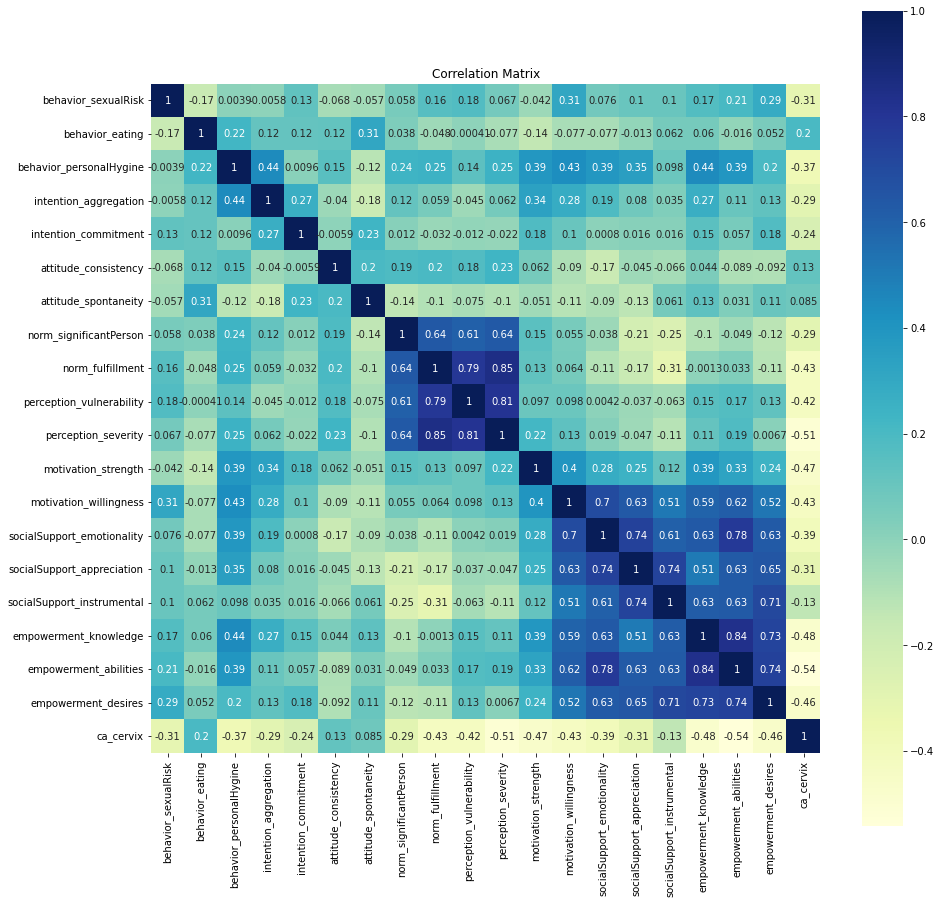

In [5]:
#Plotting the first graph as the corealtional plot through heatmap
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu')

- The above plot represent the different corelational aspects of different behaviour pattern with respect to each other, but more importantly concernig the cervical cancer corealtion.
- More positive or more blue intensity colour represent more coorelation between each features.

Plot:2

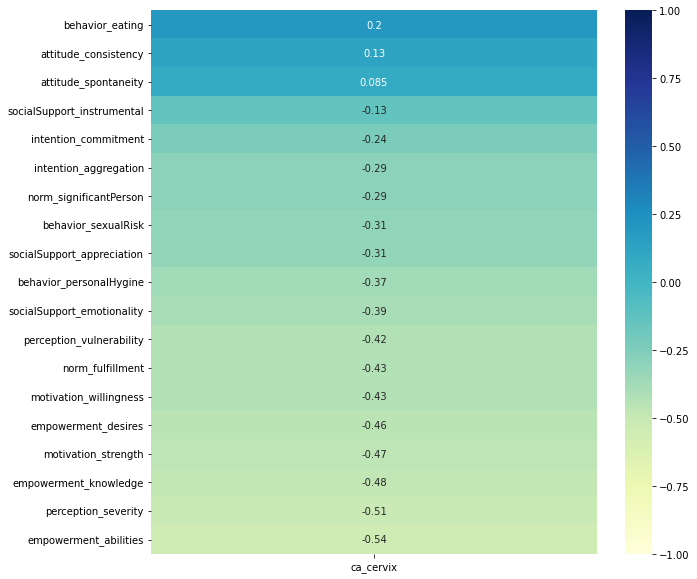

In [6]:
# Now, the corelational plot is intensify wrt to the cervical cancer attribute
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax = ax, data= df.corr()[['ca_cervix']].sort_values(by = "ca_cervix", ascending = False)[1:],vmin = -1, vmax=1, annot = True, cmap = 'YlGnBu')

- The above plot represents the strong relationship between the major behaviour activity which are possibly responsible to cause cevical cancer
- behaviour_eating, attitiude_consistency and attitude_spontaneity are the top three reasons to cause the cervical cancer as the the dataset recorded

Plot:3

In [7]:
# Separting the cancer and non cancer dataset
non_cancer = df[df["ca_cervix"] == 0]
cancer = df[df["ca_cervix"] == 1]

In [8]:
# defning the list of all the columns 
columns = list(df.columns)
columns.remove('ca_cervix')
print(columns)

['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine', 'intention_aggregation', 'intention_commitment', 'attitude_consistency', 'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment', 'perception_vulnerability', 'perception_severity', 'motivation_strength', 'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation', 'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities', 'empowerment_desires']


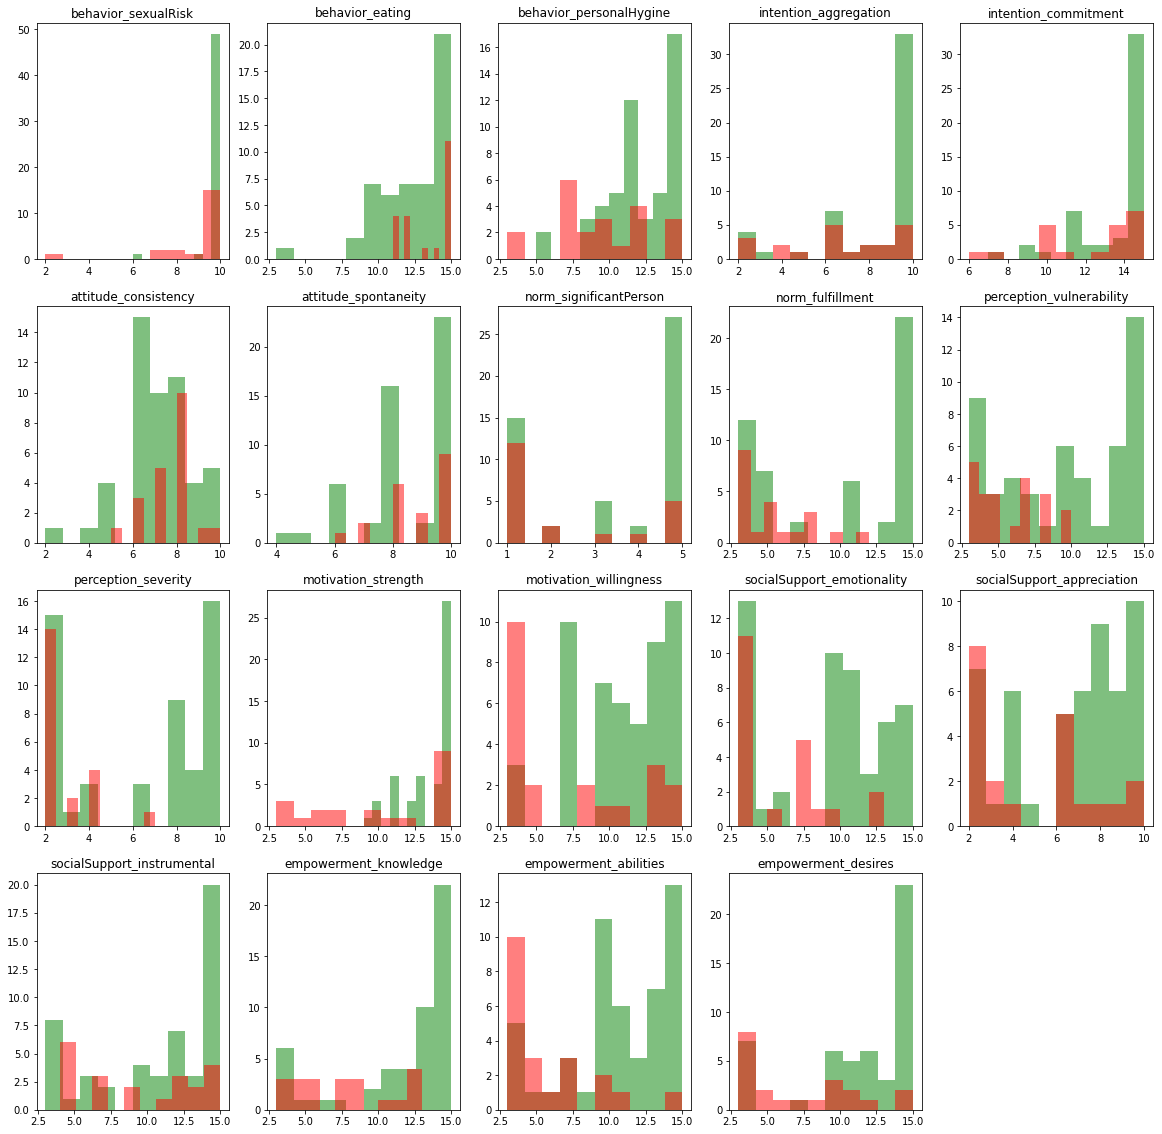

In [9]:
# Plotting the bar chart to show the cancer and non cancer factors present in each attributes

fig,axes = plt.subplots(4,5, figsize = (20,20))
axes = axes.flatten()
for co,ax in zip(columns,axes):
    ax.hist(data = non_cancer, x=co, label = "no cancer", color = "green", alpha = 0.5)
    ax.hist(data = cancer, x=co,label = "cancer", color = "red", alpha = 0.5)
    ax.title.set_text(co)

fig.delaxes(axes[19])
plt.show()

- The bar chart being plotted represent the cancer and non cancer numbers in each attributes or features
- Green represent the non cancer instances while red represent the cancer cases
- behaviour_personal_hygeince accounts kind of very large proportion in cancer cases 
- Social support behavior also changes a lot when the cancer being detected accoompanied with motivational behavior.

Plot:4

In [10]:
columns

['behavior_sexualRisk',
 'behavior_eating',
 'behavior_personalHygine',
 'intention_aggregation',
 'intention_commitment',
 'attitude_consistency',
 'attitude_spontaneity',
 'norm_significantPerson',
 'norm_fulfillment',
 'perception_vulnerability',
 'perception_severity',
 'motivation_strength',
 'motivation_willingness',
 'socialSupport_emotionality',
 'socialSupport_appreciation',
 'socialSupport_instrumental',
 'empowerment_knowledge',
 'empowerment_abilities',
 'empowerment_desires']

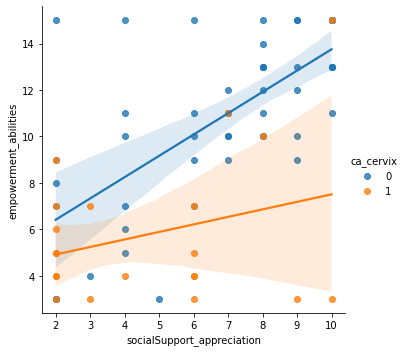

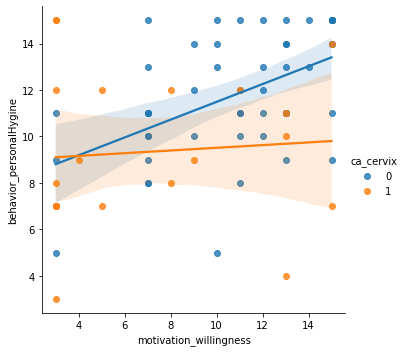

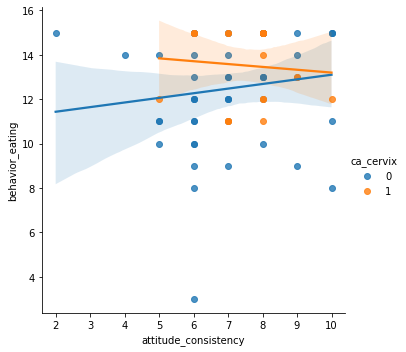

In [11]:
# Inter relation pattern between different attritubutes 
sns.lmplot (x= "socialSupport_appreciation", y = "empowerment_abilities", data = df, hue = 'ca_cervix')
sns.lmplot (x= "motivation_willingness", y = "behavior_personalHygine", data = df, hue = 'ca_cervix')
sns.lmplot (x= "attitude_consistency", y = "behavior_eating", data = df, hue = 'ca_cervix')

- motivational_willingness and behaviour_personalHygiene shows a strong relation in presuming the cancer probabilities
- the other two relations between the attributes are being show in graph 1 and 3

Plot-5

In [12]:
# Grouping the dataset into cancer and non cancer means
df_mean = df.groupby(by = 'ca_cervix').mean()
df_mean

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
ca_cervix,,,,,,,,,,,,,,,,,,,
0,9.901961,12.490196,11.803922,8.411765,13.705882,7.058824,8.529412,3.470588,9.823529,9.666667,6.490196,13.607843,10.823529,9.156863,6.745098,10.745098,11.882353,10.764706,11.588235
1,9.095238,13.523810,9.333333,6.666667,12.476190,7.476190,8.809524,2.285714,5.238095,5.714286,2.714286,10.333333,6.952381,5.523810,4.761905,9.476190,7.285714,5.809524,7.095238


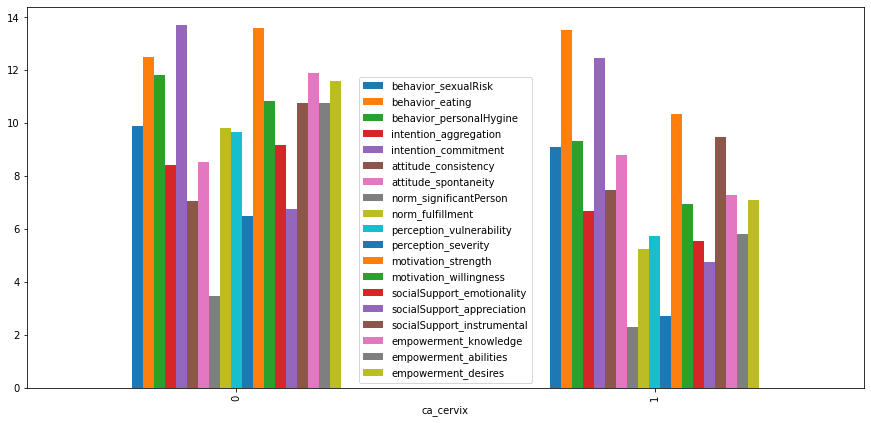

In [13]:
# PLotting bar graph 
df_mean.plot(kind= "bar", figsize =(15,7))
plt.legend()
plt.show()

- The bar chart represent the mean score of the different attritubes which are used in study to detect cancer.
- behavior_eating is the leading cause for both having cancer and not to have cancer


Concluding the EDA part: behavior_eating is the major cause for having the cervical cancer and needs to be strict in order to avoid the cancer

**3. [Marks: 15] Do data cleaning/pre-processing as required and explain what you have done for your dataset and why?**

- The dataset is quite small with having only 72 rows
- First, we will try to see the if there is any null values present in the dataset or not.
- Then, we will check the the proportion or the balance of the cancer and non cancer rows if is it balanced or not

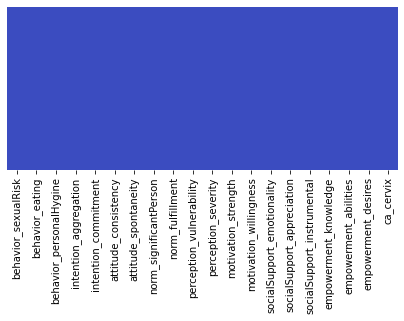

In [15]:
# Checking for null values
fig, ax = plt.subplots(figsize=(7,3))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

- Checking all the rows and there is no null values present in the dataset

0    51
1    21
Name: ca_cervix, dtype: int64


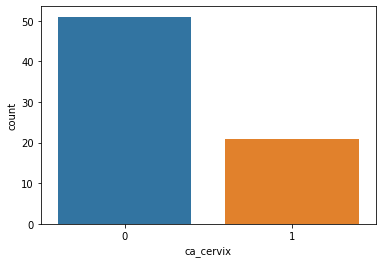

In [14]:
# Plotting the graph for the number of cancer and non cancer rows
print(df["ca_cervix"].value_counts())
sns.countplot(x = 'ca_cervix', data = df)

- It looks like the dataset is quite imbalanced
- Total number of non cancer cases are 51 while there are only 21 cases of cancer

- There are multiple ways to balance the imbalance dataset.
- We will start with a function called "resample" which basically resample the minority group over in this case is the cancer rows and brings
to the same number of the non cancer cases
- The function ramdomly copies the number of minority cases to match up with the majority cases, there is higher probabilty of getting overfitting 
in this methodolgy

In [16]:
# Separate majority and minority classes
df_majority = df[df.ca_cervix==0]
df_minority = df[df.ca_cervix==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=51,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.ca_cervix.value_counts()


1    51
0    51
Name: ca_cervix, dtype: int64

- We got the same number of both the cases

In [17]:
df_upsampled

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
21,10,12,11,10,15,7,8,3,3,3,2,13,11,10,7,12,12,12,12,0
22,10,13,14,10,15,6,8,1,5,5,2,15,10,12,8,15,15,15,15,0
23,10,15,13,10,15,2,10,1,5,6,2,14,14,14,8,14,15,14,15,0
24,10,12,10,7,15,6,8,2,4,9,2,15,12,10,7,12,14,10,14,0
25,10,15,13,10,15,6,10,1,3,5,2,15,13,9,7,12,15,11,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
10,7,15,7,10,14,7,9,1,3,8,2,4,3,7,9,13,8,3,9,1
13,9,12,14,9,15,10,9,3,6,3,2,15,15,3,10,15,11,3,11,1
18,10,11,12,2,10,8,8,2,10,8,7,6,5,3,2,4,4,4,3,1


- There is more accurate way to balance the dataset is to use the SMOTE (Synthetic Minority Oversampling TEchnique) which consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class 
and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
- We will use this technique as it performs better in smaller dataset to avoid the overfitting problems

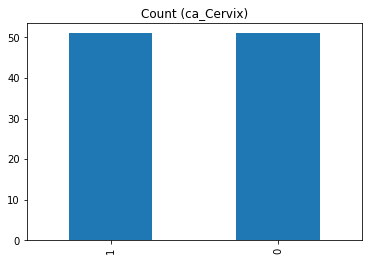

In [18]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(df[columns], df['ca_cervix'])

df_smote = pd.DataFrame(X_sm, columns=columns)
df_smote['ca_cervix'] = y_sm

df_smote['ca_cervix'].value_counts().plot(kind='bar', title='Count (ca_Cervix)');

In [19]:
df_smote

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,9,15,7,7,14,7,8,3,6,9,2,3,3,4,4,7,5,4,4,1
98,10,13,8,6,14,8,9,1,3,4,2,13,8,7,2,7,12,9,6,1
99,10,15,9,9,15,6,10,1,3,5,2,11,3,3,4,13,8,5,9,1
100,8,11,7,8,10,7,7,1,5,3,2,15,5,3,5,11,4,4,6,1


- Both the cases are balanced



Now we will split the dataset into training and testing dataset in the ratio of 75%-25% respectively

In [20]:
x = df_smote.drop(['ca_cervix'],axis=1) 
y = df_smote['ca_cervix']       # target column

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((76, 19), (26, 19), (76,), (26,))

In [22]:
# check data types in X_train

x_train.dtypes

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
dtype: object

**4. [Marks: 20] Implement 2 machine learning models, explain which algorithms you have selected and why. 
Compare them and show success metrics (Accuracy/RMSE/Confusion Matrix) as per your problem. Explain results.**

In [23]:
# Scaling the training and testing dataset
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**1. Logistics Regression**

- The first model is Logistic Regression, since it is suitable for small dataset with few attritubutes
-  Avoid complex models with many parameters, thus limiting their generalization and possibility of overfitting. Regularization techniques like L1 and L2 also help make the models more conservative. 
- A good model to get started is Logistic Regression, a linear model used when the dependent variable (target) is categorical (classification tasks)

In [24]:
# Train and fit the data in the model  

logreg = LogisticRegression(C=0.01)
logreg.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [25]:
predict_log = logreg.predict(x_test) # predicting on the test set
print(predict_log)

# probablity distribution of the 0's  & 1's
print(logreg.predict_proba(x_test)[:,0])
print(logreg.predict_proba(x_test)[:,1])

[0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0]
[0.64877521 0.33718886 0.23799268 0.72308948 0.24170324 0.39485779
 0.26229853 0.71759019 0.82845439 0.82354129 0.62966779 0.35185648
 0.38044865 0.5048138  0.46746342 0.57180097 0.68540892 0.61457588
 0.601712   0.54423376 0.86384974 0.48833057 0.39481268 0.24326366
 0.84394772 0.69177579]
[0.35122479 0.66281114 0.76200732 0.27691052 0.75829676 0.60514221
 0.73770147 0.28240981 0.17154561 0.17645871 0.37033221 0.64814352
 0.61955135 0.4951862  0.53253658 0.42819903 0.31459108 0.38542412
 0.398288   0.45576624 0.13615026 0.51166943 0.60518732 0.75673634
 0.15605228 0.30822421]


In [26]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, logreg.predict(x_train))*100))
print('Test-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, logreg.predict(x_test))*100))

Training-set accuracy score: 92.11
Test-set accuracy score: 88.46


In [27]:
print(metrics.classification_report(y_test, predict_log)) #creating classification data

print ('confusion matrix')
print (confusion_matrix(y_test,predict_log)) # creating confusion matrix


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.91      0.83      0.87        12

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26

confusion matrix
[[13  1]
 [ 2 10]]


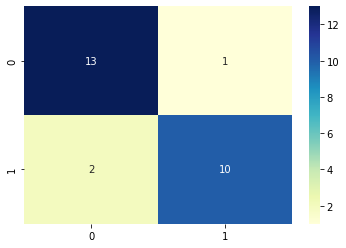

In [28]:
sns.heatmap(confusion_matrix(y_test,predict_log), annot=True, fmt='d', cmap='YlGnBu')

In [29]:
# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, predict_log)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8810


- Training set accuracy : 92.11 %
- Testing set accuracy : 88.46 %
- ROC_AUC area = 0.88
- Confusion matrix paramters like precision for 0's = 0.87 & 1's = 0.91

**2. XG Boost Classifier**

- For small dataset, tree based model is really helpful and gives good results. Tree-based models, reducing their maximum depth also limits the model's ability to see patterns and non-existent relationships
- For tree-based models like XGBoost, we can control the overfitting by tuning a series of parameters:

- Restricting the maximum depth of trees via max_depth (low values)
- Making the model more conservative via gamma and eta (high values)
- L1 and L2 regularization via reg_alpha and reg_lambda (high values)

In [30]:
# Defining the model and fitting with default parmateres.
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

[08:55:34] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
predict_xgb = xgb.predict(x_test) # predicting on the test set
print(predict_xgb)

# probablity distribution of the 0's  & 1's
print(logreg.predict_proba(x_test)[:,0])
print(logreg.predict_proba(x_test)[:,1])

[0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
[0.64877521 0.33718886 0.23799268 0.72308948 0.24170324 0.39485779
 0.26229853 0.71759019 0.82845439 0.82354129 0.62966779 0.35185648
 0.38044865 0.5048138  0.46746342 0.57180097 0.68540892 0.61457588
 0.601712   0.54423376 0.86384974 0.48833057 0.39481268 0.24326366
 0.84394772 0.69177579]
[0.35122479 0.66281114 0.76200732 0.27691052 0.75829676 0.60514221
 0.73770147 0.28240981 0.17154561 0.17645871 0.37033221 0.64814352
 0.61955135 0.4951862  0.53253658 0.42819903 0.31459108 0.38542412
 0.398288   0.45576624 0.13615026 0.51166943 0.60518732 0.75673634
 0.15605228 0.30822421]


In [32]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, xgb.predict(x_train))*100))
print('Test-set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, xgb.predict(x_test))*100))

Training-set accuracy score: 100.00
Test-set accuracy score: 92.31


In [33]:
print(metrics.classification_report(y_test, predict_xgb)) #creating classification data

print ('confusion matrix')
print (confusion_matrix(y_test,predict_xgb)) # creating confusion matrix

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.83      0.91        12

    accuracy                           0.92        26
   macro avg       0.94      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26

confusion matrix
[[14  0]
 [ 2 10]]


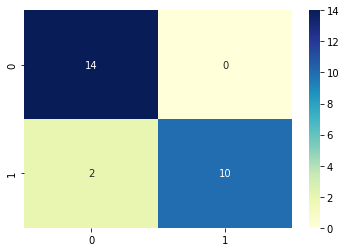

In [34]:
sns.heatmap(confusion_matrix(y_test,predict_xgb), annot=True, fmt='d', cmap='YlGnBu')

In [35]:
# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, predict_xgb)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9167


- Training set accuracy : 100 %
- Testing set accuracy : 92.31 %
- ROC_AUC area = 0.91
- Confusion matrix paramters like precision for 0's = 0.88 & 1's = 1
- This is surely a case of overfitting and we will tune the hyperparametere. 

Since due to the SMOTH techniques for balancing the dataset, both the models are getting overfitted as can be seen through the confusion matrix

**5.  Do hyperparameter tuning for your algorithms. Explain your results.**

**1. Logistics Regression**

- Initially K fold validation is performed
- The average cross-validation score is approx 0.89
- Another hyperparameter tuning will be performed using the Grid serach to find the best parameters

In [36]:
# Applying 10-Fold Cross Validation

scores = cross_val_score(logreg, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         0.875      0.875      0.875      0.875      0.875
 0.85714286 0.71428571 1.         1.        ]


In [37]:
# compute Average cross-validation score

print('Average cross-validation score on training set: {:.4f}'.format(scores.mean()))

Average cross-validation score on training set: 0.8946


In [38]:
# Putting the different range of the parameter like penalty, C , solver
parameters = [{'penalty':['l1','l2','elasticnet']}, 
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]



# Grid search is performed with cross validation to check the acuracy 
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(C=0.01),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                         {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [39]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9750


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100)


In [40]:
print('Test Set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, grid_search.predict(x_test))*100))

Test Set accuracy score: 96.15


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

ROC AUC : 0.9583


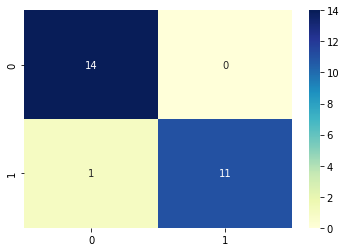

In [41]:
print(metrics.classification_report(y_test, grid_search.predict(x_test))) #creating classification data

# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, grid_search.predict(x_test))

print('ROC AUC : {:.4f}'.format(ROC_AUC))

sns.heatmap(confusion_matrix(y_test,grid_search.predict(x_test)), annot=True, fmt='d', cmap='YlGnBu')

- Training set accuracy : 97.5%
- Testing set accuracy : 96.15 %
- ROC_AUC area = 0.958
- Confusion matrix paramters like precision for 0's = 0.93 & 1's = 1

**The performance of the model got increased with the final accuracy of 96.15% after the hyperparamter tuning is performed. The overfitting is adjusted
along with other paramters**

**2. XG Boost Classifier**

In [42]:
import warnings
warnings.filterwarnings("ignore")

# Different pararmeter are put into range to control the overfitting of the model

parameters_xgb = [{'reg_lambda' : [0.1,0.5,1]},
                      {'reg_alpha': [0.1,0.5,1]},
                      {'max_depth':[0.1,1,2,3,4]}, 
                      {'gamma': [1,2,3,4]}]


# Grid search is performed with cross validation and accuracy as the scoring factor
grid_search_xgb = GridSearchCV(xgb ,  
                           param_grid = parameters_xgb,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search_xgb.fit(x_train, y_train)


[08:55:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:43] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [43]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_xgb.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_xgb.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_xgb.best_estimator_))

GridSearch CV best score : 0.9475


Parameters that give the best results : 

 {'max_depth': 1}


Estimator that was chosen by the search : 

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [44]:
print('Test Set accuracy score: {0:0.2f}'. format(accuracy_score(y_test, grid_search_xgb.predict(x_test))*100))

Test Set accuracy score: 92.31


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.83      0.91        12

    accuracy                           0.92        26
   macro avg       0.94      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26

ROC AUC : 0.9167


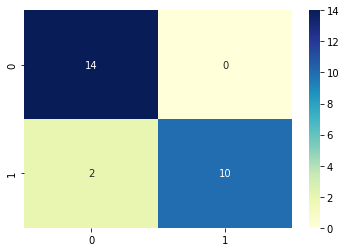

In [45]:
print(metrics.classification_report(y_test, grid_search_xgb.predict(x_test))) #creating classification data

# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, grid_search_xgb.predict(x_test))

print('ROC AUC : {:.4f}'.format(ROC_AUC))

sns.heatmap(confusion_matrix(y_test,grid_search_xgb.predict(x_test)), annot=True, fmt='d', cmap='YlGnBu')

- Training set accuracy : 94.75 %
- Testing set accuracy : 92.31 %
- ROC_AUC area = 0.91
- Confusion matrix paramters like precision for 0's = 0.88 & 1's = 1

**The final overfitting has been reduced as the bias and the variance trade off looks better after the hyperparameter tuning. The final accuarcy 
is approx 92% which is lower the logistics due to the tree model are more prone to overfitting**

**Random features selection through ExtraTree Classifier**

In [46]:
TOP_FEATURES = 10

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0)

indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 10 (0.168520)
2. feature 18 (0.127108)
3. feature 8 (0.096458)
4. feature 17 (0.072734)
5. feature 13 (0.067107)
6. feature 16 (0.066291)
7. feature 7 (0.053779)
8. feature 3 (0.051164)
9. feature 9 (0.042619)
10. feature 14 (0.041389)


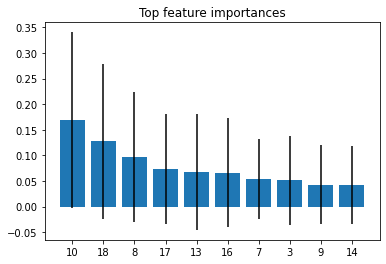

In [47]:
# Plotting graph with the top featues importance
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()